# Reporte de práctica 11: Agrupamiento de datos

Para esta práctica solamente trabajamos con los datos del año 2017, los mismos que utilizamos la práctica pasada, salvo que se encontró el error “47”, era un string con muchos tabuladores y ocasionó error de conversión a float. En esta práctica realizaremos clústeres con de la información, no proporcionaremos etiquetas para clasificar, dejaremos que los datos por su propia naturaleza y aplicando distintos algoritmos se agrupen ellos mismos.  


## Objetivos

* Utiliza por dos algoritmos de agrupamiento.
* Reportar los hallazgos con gráficas y con medidas de calidad.

## Algoritmos de agrupamiento.
Utilizaremos los algoritmos de agrupamiento mostrados en [el tutorial de agrupamiento de scikit-learn](https://scikit-learn.org/stable/modules/clustering.html) y seleccionamos dos para aplicar. Usamos los siguientes:

*  K-Means
* Affinity Propagation

## Preparación de los datos

Primero tomamos los archivos originales y los procesamos fuera de la nube, producto de esta limpieza se generó el archivo "clasificacion2017.csv" en la práctica pasada.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df0 = pd.read_excel('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/2018.xlsx', index_col=None, header=0, sheet_name=0)
df0 = df0[['Categoria','Edad','Pais', 'Titulo','Genero', 'Duracion', 'Marca','Referencia','Dias','Marcas','Personas','Sinopsis']]
df0 = df0.dropna()
print(len(df0))

266


## Algoritmo K-Means

Este algoritmo agrupa los datos al tratar de separar muestras en $n$ grupos de igual varianza, minimizando un criterio conocido como la inercia o la suma de cuadrados dentro del grupo. Este algoritmo requiere que se especifique la cantidad de grupos. Se adapta bien a un gran número de muestras y se ha utilizado en una amplia gama de áreas de aplicación en muchos campos diferentes.

### Aplicación de K-Means

266
(36, 'integrantes en grupo', 0)
(12, 'integrantes en grupo', 1)
(16, 'integrantes en grupo', 2)
(42, 'integrantes en grupo', 3)
(34, 'integrantes en grupo', 4)
(29, 'integrantes en grupo', 5)
(48, 'integrantes en grupo', 6)
(15, 'integrantes en grupo', 7)
(7, 'integrantes en grupo', 8)
(3, 'integrantes en grupo', 9)
(24, 'integrantes en grupo', 10)


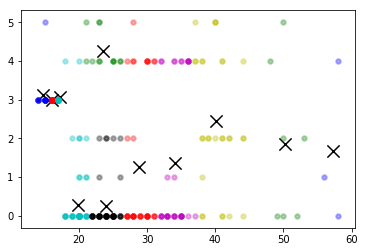

0.5220206737202812


In [2]:
from sklearn import metrics
from numpy.random import seed
from sklearn.cluster import KMeans
from numpy import isnan, nan, take, where

df1 = pd.read_excel('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/2018.xlsx', index_col=None, header=0, sheet_name=0)
df1 = df1[['Categoria','Edad','Pais', 'Titulo','Genero', 'Duracion', 'Marca','Referencia','Dias','Marcas','Personas','Sinopsis']]
df1 = df1.dropna()
print(len(df1))
d = df1

cat = pd.Categorical(d.Categoria)
d.Categoria = cat.codes

gen = pd.Categorical(d.Genero)
d.Genero = gen.codes

pai = pd.Categorical(d.Pais)
d.Pais = pai.codes

mar = pd.Categorical(d.Marca) 
d.Marca = mar.codes

d['sin'] = d["Sinopsis"].str.len()

keep = ['Edad', 'Categoria'] 
d = d.loc[:, keep]
d = d.dropna() 
x = d.values
k = 11
m = KMeans(init = 'random', n_clusters = k, n_init = 1)
m.fit(x)
centroides = m.cluster_centers_
grupos = m.predict(x)
plt.figure(1)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=150, linewidths=3, color='black', zorder=10)
colores = 3*['r', 'g', 'b','c','m','y','k']
for g in range(k):
    incl = where(grupos == g)[0]
    print(len(incl), "integrantes en grupo", g)
    grupo = take(x, incl, 0)
    plt.scatter(grupo[:, 0], grupo[:, 1], marker='o', s=20, linewidths=2, color=colores[g], alpha = 0.3, zorder=10)
plt.show()
print(metrics.silhouette_score(x, grupos, metric='euclidean'))

Probemos con diferentes valores de $k$ para ver cuál da el mejor valor del coeficiente de silueta.

266


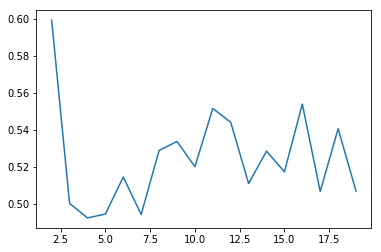

In [3]:
import pandas as pd
from sklearn import metrics
from numpy.random import seed
from numpy import isnan, nan, take, where
from sklearn.cluster import KMeans



df2 = pd.read_excel('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/2018.xlsx', index_col=None, header=0, sheet_name=0)
df2 = df2[['Categoria','Edad','Pais', 'Titulo','Genero', 'Duracion', 'Marca','Referencia','Dias','Marcas','Personas','Sinopsis']]
df2 = df2.dropna()
print(len(df2))
d = df2

cat = pd.Categorical(d.Categoria)
d.Categoria = cat.codes

gen = pd.Categorical(d.Genero)
d.Genero = gen.codes

pai = pd.Categorical(d.Pais)
d.Pais = pai.codes

mar = pd.Categorical(d.Marca) 
d.Marca = mar.codes

keep = ['Edad', 'Categoria'] 
d = d.loc[:, keep]
d = d.dropna() 
x = d.values
ks = [k for k in range(2, 20)]
sil = []
for k in ks:
    m = KMeans(init = 'random', n_clusters = k, n_init = 10)
    m.fit(x)
    sil.append(metrics.silhouette_score(x, m.predict(x), metric='euclidean'))
plt.figure(1)
plt.plot(ks, sil)
plt.show()



En definitiva, la gráfica nos muestra que el hacer el agrupamiento en dos grupos es el que obtiene la mejor calidad de agrupamiento, tiene un ligero incremento al hacer separaciones de ocho grupos. Después ya que no vuelve a crecer la calidad si hacemos la división en más grupos.

## Algoritmo Affinity Propagation

Este algoritmo crea clústeres enviando mensajes entre pares de muestras hasta la convergencia. Luego se describe un conjunto de datos utilizando un pequeño número de ejemplares, que se identifican como los más representativos de otras muestras. Los mensajes enviados entre pares representan la idoneidad para que una muestra sea el ejemplar de la otra, que se actualiza en respuesta a los valores de otros pares. Esta actualización ocurre de manera iterativa hasta la convergencia, momento en el que se eligen los ejemplares finales y, por lo tanto, se proporciona la agrupación final.


### Aplicación de Affinity Propagation

(23, 'integrantes en grupo', 0)
(26, 'integrantes en grupo', 1)
(16, 'integrantes en grupo', 2)
(48, 'integrantes en grupo', 3)
(54, 'integrantes en grupo', 4)
(22, 'integrantes en grupo', 5)
(3, 'integrantes en grupo', 6)
(14, 'integrantes en grupo', 7)
(41, 'integrantes en grupo', 8)
(12, 'integrantes en grupo', 9)
(7, 'integrantes en grupo', 10)


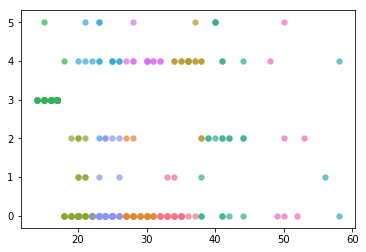

0.564122635978908


In [4]:
import seaborn as sns
from numpy import take, where, unique, concatenate
from sklearn.cluster import AffinityPropagation
m = AffinityPropagation(damping = 0.9, convergence_iter = 30)

xVars =  ['Edad', 'Categoria']    

d = d.loc[:, xVars]
x = d.values

c = m.fit(x)
grupos = c.labels_
plt.clf()
plt.figure(1)
k = len(unique(grupos))
colores = sns.color_palette("husl", k)
for g in range(k):
    incl = where(grupos == g)[0]
    print(len(incl), "integrantes en grupo", g)
    grupo = take(x, incl, 0)
    plt.scatter(grupo[:, 0], grupo[:, 1], marker='o', s=20, linewidths=2, color=colores[g], alpha = 0.6, zorder=5)
plt.show()
print(metrics.silhouette_score(x, grupos, metric='euclidean'))

## Conclusión
Al aplicar estos dos algoritmos de agrupamiento se puede notar que la mejor forma de agrupar estos datos es en dos grupos, aunque el K-Means tuvo una mejor calidad de solución al obtener 0.5220206737202812 y el AffinityPropagation obtuvo 0.564122635978908. En K-Means se agrupan las edades en once grupos y en AffinityPropagation a pesar de que tiene la misma cantidad de grupos, tiene una mejor precisión que el K-Means para este caso.

--06 de junio 2019-- Luis Angel Gutiérrez Rodríguez 1484412